<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite"
response = requests.get(url)

with open("m4_survey_data.sqlite", "wb") as file:
    file.write(response.content)

print("Download complete.")


Download complete.


Connect to the database.


In [3]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [4]:
import pandas as pd

## Demo: How to run an sql query


In [5]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [6]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [7]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [8]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [11]:
print(df.head())


                                                 sql
0  CREATE TABLE "master" (\n"index" INTEGER,\n  "...


In [12]:
QUERY = "SELECT * FROM master"
df = pd.read_sql_query(QUERY, conn)
print(df.columns)


Index(['index', 'Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer',
       'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel',
       'UndergradMajor', 'OrgSize', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek',
       'LastHireDate', 'FizzBuzz', 'ResumeUpdate', 'CurrencySymbol',
       'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs',
       'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'OpSys', 'BlockchainOrg', 'BlockchainIs',
       'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion',
       'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOFindAnswer',
       'SOTimeSaved', 'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs',
       'EntTeams', 'SOComm', 'WelcomeChange', 'Age', 'Trans', 'Dependents',
       'SurveyLength', 'SurveyEase'],
      dtype='object')


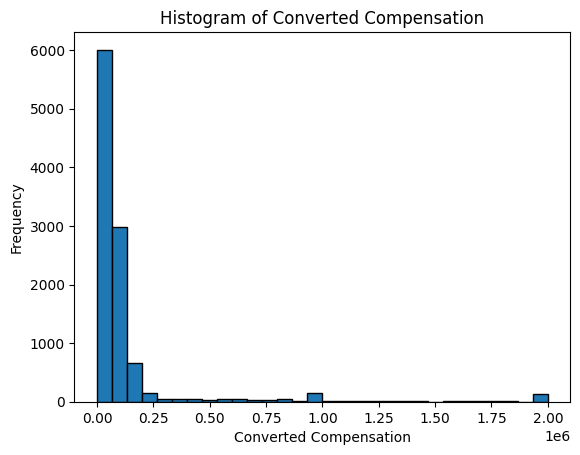

In [13]:
import matplotlib.pyplot as plt

# Plot a histogram of the 'ConvertedComp' column
df['ConvertedComp'].plot(kind='hist', bins=30, edgecolor='black')

# Add labels and title for clarity
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.title('Histogram of Converted Compensation')

# Show the plot
plt.show()


### Box Plots


Plot a box plot of `Age.`


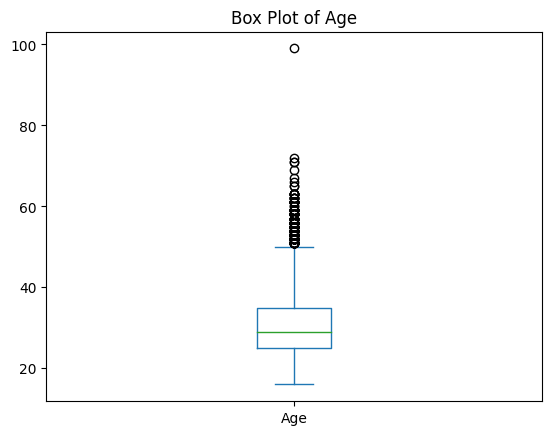

In [14]:
import matplotlib.pyplot as plt

# Plot a box plot of the 'Age' column
df['Age'].plot(kind='box')

# Add a title for clarity
plt.title('Box Plot of Age')

# Show the plot
plt.show()


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


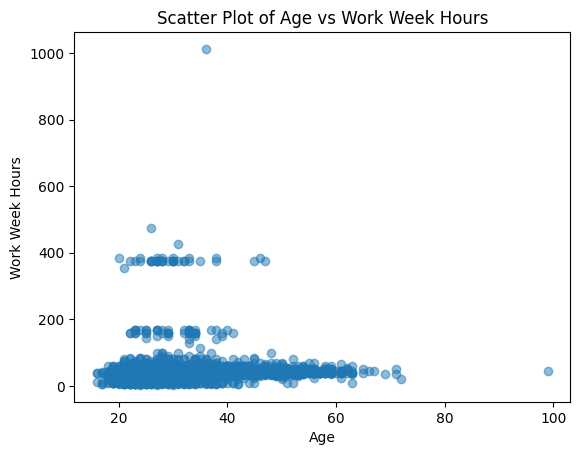

In [15]:
import matplotlib.pyplot as plt

# Create a scatter plot of 'Age' vs 'WorkWeekHrs'
plt.scatter(df['Age'], df['WorkWeekHrs'], alpha=0.5)

# Add labels and title for clarity
plt.xlabel('Age')
plt.ylabel('Work Week Hours')
plt.title('Scatter Plot of Age vs Work Week Hours')

# Show the plot
plt.show()



### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


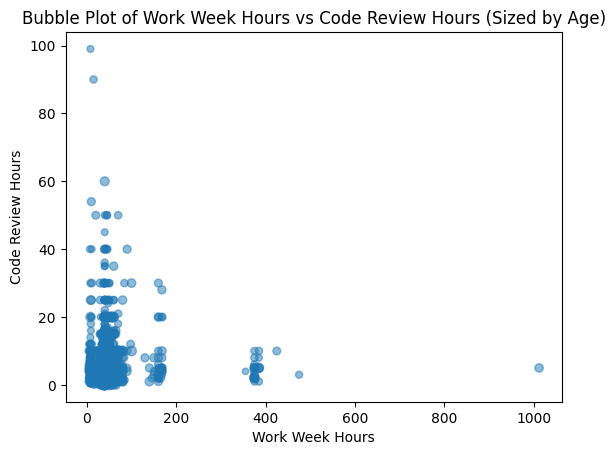

In [16]:
import matplotlib.pyplot as plt

# Normalize the bubble size by scaling the 'Age' column
bubble_size = df['Age'] / df['Age'].max() * 100

# Create a bubble plot of 'WorkWeekHrs' vs 'CodeRevHrs' with 'Age' as bubble size
plt.scatter(df['WorkWeekHrs'], df['CodeRevHrs'], s=bubble_size, alpha=0.5)

# Add labels and title for clarity
plt.xlabel('Work Week Hours')
plt.ylabel('Code Review Hours')
plt.title('Bubble Plot of Work Week Hours vs Code Review Hours (Sized by Age)')

# Show the plot
plt.show()




## Visualizing composition of data


### Pie Charts


In [20]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite"
response = requests.get(url)

with open("m4_survey_data.sqlite", "wb") as file:
    file.write(response.content)

print("Download complete.")


Download complete.


In [22]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


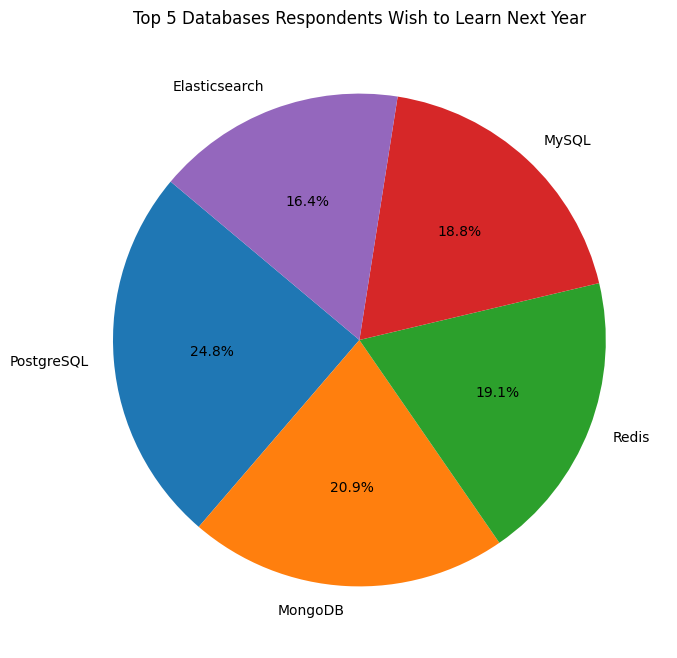

In [23]:
# Query the DatabaseDesireNextYear table
QUERY = "SELECT * FROM DatabaseDesireNextYear"
df_databases = pd.read_sql_query(QUERY, conn)

# Count the occurrences of each database
db_counts = df_databases['DatabaseDesireNextYear'].value_counts().head(5)

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(db_counts, labels=db_counts.index, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')

# Show the plot
plt.show()


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


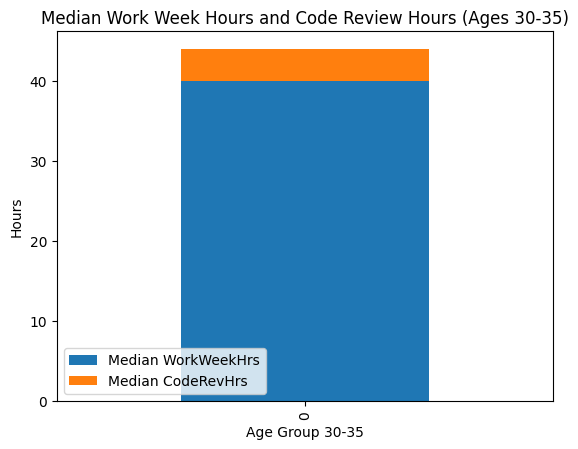

In [24]:
import matplotlib.pyplot as plt

# Filter the DataFrame for respondents aged 30 to 35
age_group_df = df[(df['Age'] >= 30) & (df['Age'] <= 35)]

# Calculate the median WorkWeekHrs and CodeRevHrs
median_workweekhrs = age_group_df['WorkWeekHrs'].median()
median_coderevhrs = age_group_df['CodeRevHrs'].median()

# Prepare the data for the stacked bar chart
data = {
    'Median WorkWeekHrs': [median_workweekhrs],
    'Median CodeRevHrs': [median_coderevhrs]
}

# Convert the data into a DataFrame
stacked_df = pd.DataFrame(data)

# Plot the stacked bar chart
stacked_df.plot(kind='bar', stacked=True)

# Add labels and title for clarity
plt.xlabel('Age Group 30-35')
plt.ylabel('Hours')
plt.title('Median Work Week Hours and Code Review Hours (Ages 30-35)')

# Show the plot
plt.show()


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


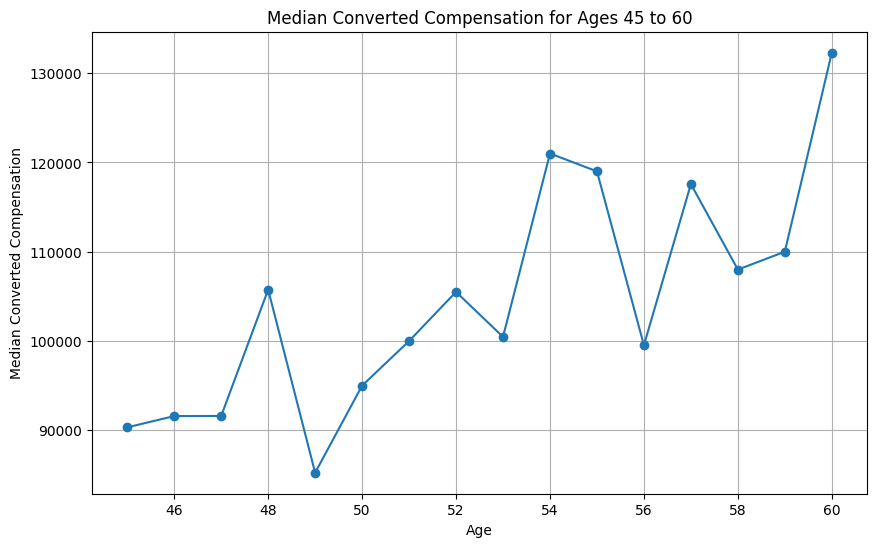

In [25]:
import matplotlib.pyplot as plt

# Filter the DataFrame for respondents aged 45 to 60
age_group_df = df[(df['Age'] >= 45) & (df['Age'] <= 60)]

# Group by age and calculate the median ConvertedComp
median_convertedcomp = age_group_df.groupby('Age')['ConvertedComp'].median()

# Plot the median ConvertedComp for each age
plt.figure(figsize=(10, 6))
median_convertedcomp.plot(kind='line', marker='o')

# Add labels and title for clarity
plt.xlabel('Age')
plt.ylabel('Median Converted Compensation')
plt.title('Median Converted Compensation for Ages 45 to 60')

# Show the plot
plt.grid(True)
plt.show()



### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


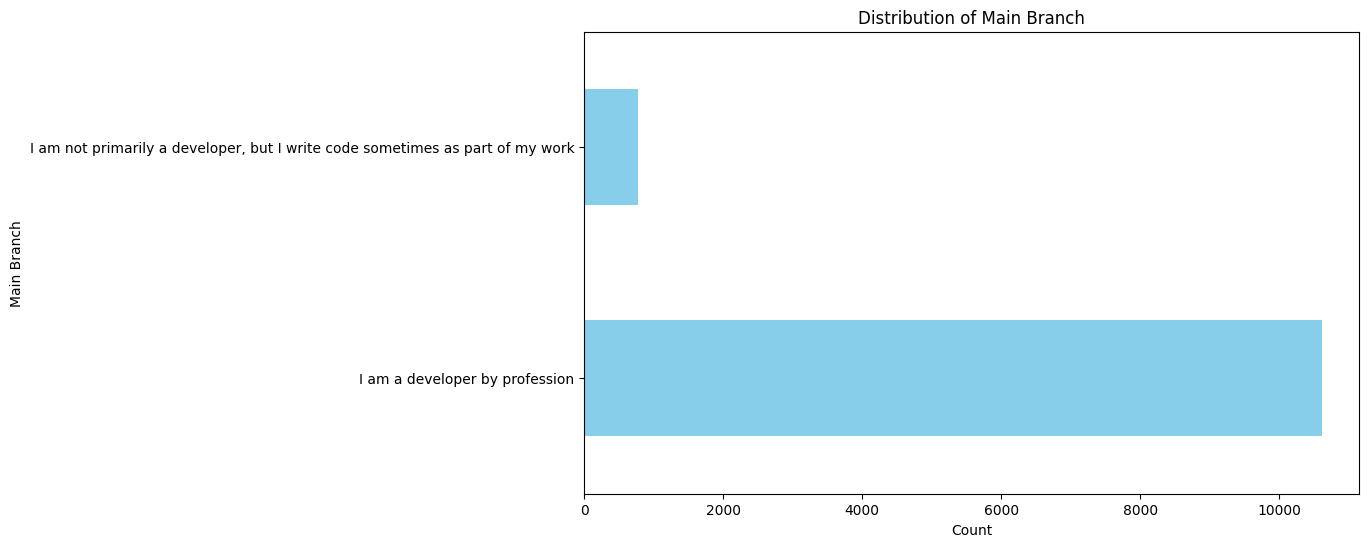

In [26]:
import matplotlib.pyplot as plt

# Count the occurrences of each unique value in the 'MainBranch' column
mainbranch_counts = df['MainBranch'].value_counts()

# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
mainbranch_counts.plot(kind='barh', color='skyblue')

# Add labels and title for clarity
plt.xlabel('Count')
plt.ylabel('Main Branch')
plt.title('Distribution of Main Branch')

# Show the plot
plt.show()



Close the database connection.


In [27]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
